## Introduction to clustering using K-means

Load the a dataset first.

In [3]:
from chelo.datasets import AmesMutagenicityDataset

dataset = AmesMutagenicityDataset()
dataset.load_data()
X, y = dataset.to_numpy()

y = y.ravel()

Step 1: Cluster the dataset

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


KMeans(n_clusters=4)

Get the clusters of each sample

In [5]:
idx = kmeans.predict(X)
print(idx)

[0 0 0 ... 0 2 1]


Step 2: Plot the data and clusters

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_low = pca.fit_transform(X)


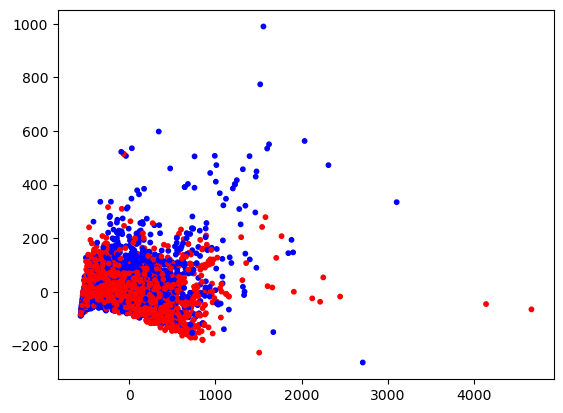

In [8]:
# Plot by label
from matplotlib.colors import LinearSegmentedColormap
colors = ['blue', 'cyan', 'green', 'yellow', 'red']
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
plt.scatter(x_low[:, 0], x_low[:, 1], s=10, c=y, cmap=cmap)

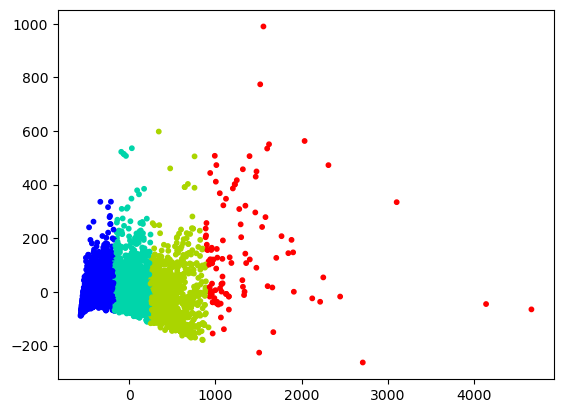

In [9]:
# Plot by cluster
from matplotlib.colors import LinearSegmentedColormap

colors = ['blue', 'cyan', 'green', 'yellow', 'red']
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
plt.scatter(x_low[:, 0], x_low[:, 1], s=10, c=idx, cmap=cmap)

Try clustering on the lower dimensional space

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_low)
idx = kmeans.predict(x_low)

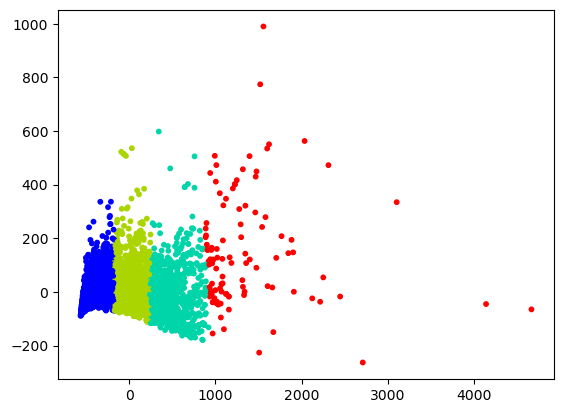

In [11]:
# Plot by cluster
plt.scatter(x_low[:, 0], x_low[:, 1], s=10, c=idx, cmap=cmap)

We can also perform clustering on different spaces:

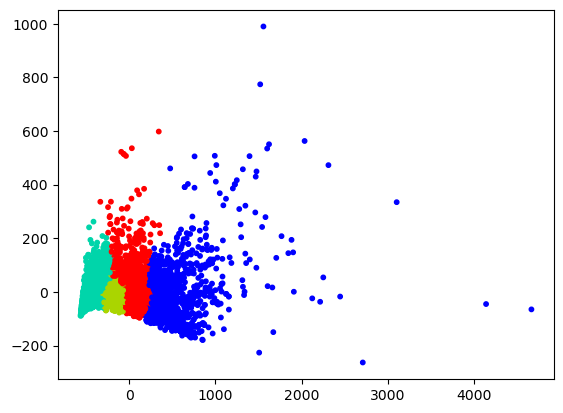

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(X, y)

kmeans = KMeans(n_clusters=4)
kmeans.fit(x_tsne)
idx = kmeans.predict(x_tsne)

plt.scatter(x_low[:, 0], x_low[:, 1], s=10, c=idx, cmap=cmap)


We can also examinte the clustering in the original space:

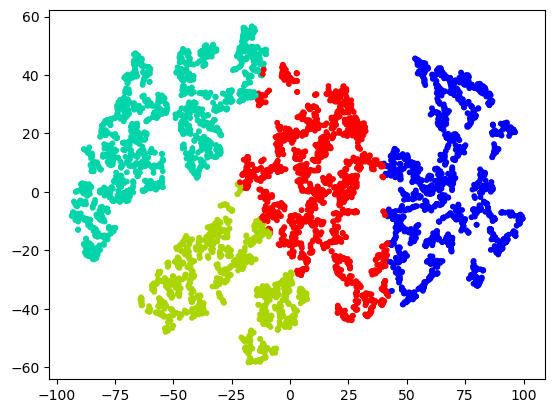

In [13]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], s=10, c=idx, cmap=cmap)

We could even perform clustering on higher dimensional projection:

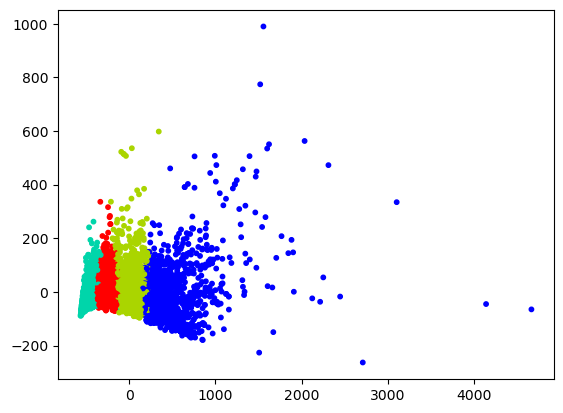

In [14]:
tsne = TSNE(n_components=3)
x_tsne = tsne.fit_transform(X, y)

kmeans = KMeans(n_clusters=4)
kmeans.fit(x_tsne)
idx = kmeans.predict(x_tsne)

plt.scatter(x_low[:, 0], x_low[:, 1], s=10, c=idx, cmap=cmap)